[View in Colaboratory](https://colab.research.google.com/github/davidvela/testColabGH/blob/master/tensorflow_Tutorials.ipynb)

# Tensorflow Tutorials - Intro

my noes: 
seems like tensorflow examples are getting more and more closed to keros... <br> 
the code seems more simple and with less lines. <br> 
the question is if it will affect performance and if keras has all the objects and all the customization from the old tensorflow libraries... (tf.layers ... )

##### Copyright 2018 The TensorFlow Authors.

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Fashion MNIST dataset
Train your first neural network: basic classification
 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#      0             1          2          3       4         5        6       7         8       9
# 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [0]:
print(train_images.shape) 
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
# scale values from 0 to 1. 
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# train the model: 
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model: 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
#  This model reaches an accuracy of about 0.88 (or 88%) on the training data.

# Testing
predictions = model.predict(test_images)

# examples: 
print(predictions[0])
print(np.argmax(predictions[0]))

In [0]:
test_labels[0]

## Make predictions

With the model trained, we can use it to make predictions about some images.

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

In [0]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

Finally, use the trained model to make a prediction about a single image. 

In [0]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

Now predict the image:

In [0]:
predictions = model.predict(img)
print(predictions)
prediction = predictions[0]
np.argmax(prediction)

# The Boston Housing Prices dataset

In [0]:
# ... 

# Neural Machine Translation with Attention
   <table class="tfo-notebook-buttons" align="left"><td>
      <a target="_blank"  href="https://colab.sandbox.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/contrib/eager/python/examples/nmt_with_attention/nmt_with_attention.ipynb">
      <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
        <span>Run in Google Colab</span></a>  
        </td><td>
        <a target="_blank"  href="https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager/python/examples/nmt_with_attention/nmt_with_attention.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /><span>View source on GitHub</span></a></td>
</table>

In [0]:
# ... 

In [0]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.9 and enable eager execution
import tensorflow as tf

tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import time
print(tf.__version__)

# TensorflowHub  (TH)
  https://www.tensorflow.org/hub/ <br>
  modules: https://www.tensorflow.org/hub/modules/google/imagenet/inception_resnet_v2/classification/1
  

##   example: <br>

```
import tensorflow as tf
import tensorflow_hub as hub

with tf.Graph().as_default():
  module_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1"
  embed = hub.Module(module_url)
  embeddings = embed(["A long sentence.", "single-word",      "http://example.com"])

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())

    print(sess.run(embeddings))
    ```

## nnlm-en-dim128-with-normalization

In [1]:
# https://www.tensorflow.org/hub/

import tensorflow as tf
import tensorflow_hub as hub

with tf.Graph().as_default():
  module_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1"
  embed = hub.Module(module_url)
  embeddings = embed(["A long sentence.", "single-word",
                      "http://example.com"])

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())

    print(sess.run(embeddings))


INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1'.
INFO:tensorflow:Initialize variable module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/2cdbcae1a547f4fb93475d4b7d4140f8590995b7/variables/variables' with embeddings
[[ 1.27072588e-01  1.70752838e-01 -9.90944505e-02  7.04903603e-02
   2.26204265e-02 -8.07912350e-02  1.34882599e-01  9.98359919e-02
  -9.38840210e-02  1.57970995e-01  1.49555340e-01 -7.23052993e-02
   2.82968562e-02 -7.33467517e-03  7.44888186e-02 -2.56097335e-02
   1.71663105e-01 -2.87602507e-02  5.61525524e-02  1.13487214e-01
  -1.64960790e-02 -6.53510634e-03 -2.56301146e-02 -8.42670649e-02
   8.53472874e-02 -5.40463366e-02  7.97923282e-02 -1.38562024e-01
  -1.34141564e-01 -7.57983997e-02 -9.42738429e-02 -7.67866522e-02
  -1.52945921e-01  1.805

## img. class - inception_resnet_v2

In [0]:
module = hub.Module("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].

## IMG retraining
https://www.tensorflow.org/hub/tutorials/image_retraining 

# TH - text classification tutorial
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>
<br><br><br>

data:  [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) 

The dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. 

The task is to label the reviews as **negative** or **positive**.


In [1]:
# >>> Preparing environment
# Install the latest Tensorflow version.
!pip install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn


# >>>>> import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


In [2]:
# data:  
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
  data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
      data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["polarity"] = 1
  neg_df["polarity"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)
  
  train_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))
  
  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

train_df, test_df = download_and_load_datasets()
train_df.head()

84131840/84125825 [==============================] - 2s 0us/step


,sentence,sentiment,polarity
0,The episodic version of Robert Heinlein's Star...,3,0
1,Normally I try to avoid Sci-Fi movies as much ...,9,1
2,Most who go to this movie will have an idea wh...,7,1
3,<br /><br />An old man works as a janitor in a...,10,1
4,I have to say the first I watched this film wa...,1,0


## Model
**Input functions** 
[Estimator framework](https://www.tensorflow.org/get_started/premade_estimators#overview_of_programming_with_estimators) provides [input functions](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn) that wrap Pandas dataframes.

**  Feature columns ** 

TF-Hub provides a [feature column](https://github.com/tensorflow/hub/blob/master/docs/api_docs/python/hub/text_embedding_column.md) that applies a module on the given text feature and passes further the outputs of the module. In this tutorial we will be using the [nnlm-en-dim128 module](https://tfhub.dev/google/nnlm-en-dim128/1). For the purpose of this tutorial, the most important facts are:

* The module takes **a batch of sentences in a 1-D tensor of strings** as input.
* The module is responsible for **preprocessing of sentences** (e.g. removal of punctuation and splitting on spaces).
* The module works with any input (e.g. **nnlm-en-dim128** hashes words not present in vocabulary into ~20.000 buckets).

**  Estimator**  For classification we can use a [DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier) (note further remarks about different modelling of the label function at the end of the tutorial).

In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["polarity"], shuffle=False)

embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

#>>> estimator 
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))


In [0]:
#>>> training 
# Training for 1,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 5 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=1000);



In [20]:
#>>>> new data 
test_df  # .columns # Index(['sentence', 'sentiment', 'polarity'], dtype='object')
d =  { 'sentence': ['I liked the movie', 
                    'I hate the movie'], 
      'sentiment': [8, 1], 
      'polarity': [1, 0] }


new_df = pd.DataFrame(data=d)
# new_df

predict_new_input_fn = tf.estimator.inputs.pandas_input_fn(
    new_df, new_df["polarity"], shuffle=False)

# new_eval_result = estimator.evaluate(input_fn=predict_new_input_fn)
new_pred_result = estimator.predict(input_fn=predict_new_input_fn)

# template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')
# print(template.format(iris_data.SPECIES[class_id],
#                       100 * probability, expec))

for pred_dict in zip(new_pred_result): 
  print( pred_dict )
  print( pred_dict[0]["probabilities"]  )
#   print( "prob to be 0: {} " .format( pred_dict["probabilities"][0] ) )


({'logits': array([0.58009857], dtype=float32), 'logistic': array([0.6410901], dtype=float32), 'probabilities': array([0.3589099, 0.6410901], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)},)
[0.3589099 0.6410901]
({'logits': array([-1.2877575], dtype=float32), 'logistic': array([0.21623263], dtype=float32), 'probabilities': array([0.78376734, 0.21623261], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.78376734 0.21623261]


In [5]:
#>>> Predictions
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

Training set accuracy: 0.7991600036621094
Test set accuracy: 0.7907199859619141


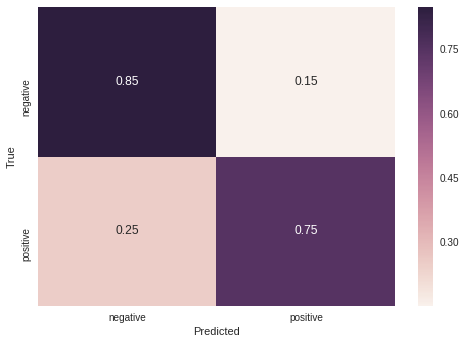

In [6]:
# confusion matrix: 
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(train_df["polarity"], 
                           get_predictions(estimator, predict_train_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

# Further improvements

1. **Regression on sentiment**: we used a classifier to assign each example into a polarity class. But we actually have another categorical feature at our disposal - sentiment. Here classes actually represent a scale and the underlying value (positive/negative) could be well mapped into a continuous range. We could make use of this property by computing a regression ([DNN Regressor](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/DNNRegressor)) instead of a classification ([DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/DNNClassifier)).
2. **Larger module**: for the purposes of this tutorial we used a small module to restrict the memory use. There are modules with larger vocabularies and larger embedding space that could give additional accuracy points.
3. **Parameter tuning**: we can improve the accuracy by tuning the meta-parameters like the learning rate or the number of steps, especially if we use a different module. A validation set is very important if we want to get any reasonable results, because it is very easy to set-up a model that learns to predict the training data without generalizing well to the test set.
4. **More complex model**: we used a module that computes a sentence embedding by embedding each individual word and then combining them with average. One could also use a sequential module (e.g. [Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/2) module) to better capture the nature of sentences. Or an ensemble of two or more TF-Hub modules.
5. **Regularization**: to prevent overfitting, we could try to use an optimizer that does some sort of regularization, for example [Proximal Adagrad Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/ProximalAdagradOptimizer).

# Advanced: Transfer learning analysis

Transfer learning makes it possible to **save training resources** and to achieve good model generalization even when **training on a small dataset**. In this part, we will demonstrate this by training with two different TF-Hub modules:

* **[nnlm-en-dim128](https://tfhub.dev/google/nnlm-en-dim128/1)** - pretrained text embedding module,
* **[random-nnlm-en-dim128](https://tfhub.dev/google/random-nnlm-en-dim128/1)** - text embedding module that has same vocabulary and network as **nnlm-en-dim128**, but the weights were just randomly initialized and never trained on real data.

And by training in two modes: 

* training **only the classifier** (i.e. freezing the module), and 
* training the **classifier together with the module**.

Let's run a couple of trainings and evaluations to see how using a various modules can affect the accuracy.

In [0]:
def train_and_evaluate_with_module(hub_module, train_module=False):
  embedded_text_feature_column = hub.text_embedding_column(
      key="sentence", module_spec=hub_module, trainable=train_module)

  estimator = tf.estimator.DNNClassifier(
      hidden_units=[500, 100],
      feature_columns=[embedded_text_feature_column],
      n_classes=2,
      optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

  estimator.train(input_fn=train_input_fn, steps=1000)

  train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
  test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

  training_set_accuracy = train_eval_result["accuracy"]
  test_set_accuracy = test_eval_result["accuracy"]

  return {
      "Training accuracy": training_set_accuracy,
      "Test accuracy": test_set_accuracy
  }


results = {}
results["nnlm-en-dim128"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/nnlm-en-dim128/1")
results["nnlm-en-dim128-with-module-training"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/nnlm-en-dim128/1", True)
results["random-nnlm-en-dim128"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/random-nnlm-en-dim128/1")
results["random-nnlm-en-dim128-with-module-training"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/random-nnlm-en-dim128/1", True)

In [8]:
pd.DataFrame.from_dict(results, orient="index")

,Training accuracy,Test accuracy
nnlm-en-dim128,0.80280,0.79460
nnlm-en-dim128-with-module-training,0.95128,0.87140
random-nnlm-en-dim128,0.71920,0.67704
random-nnlm-en-dim128-with-module-training,0.76648,0.71956


In [9]:
estimator.evaluate(input_fn=predict_test_input_fn)["accuracy_baseline"]

0.5

In [28]:
estimator.evaluate(input_fn=predict_test_input_fn)

{'accuracy': 0.79072,
 'accuracy_baseline': 0.5,
 'auc': 0.8763104,
 'auc_precision_recall': 0.8787724,
 'average_loss': 0.44577765,
 'global_step': 1000,
 'label/mean': 0.5,
 'loss': 56.859394,
 'precision': 0.8274464,
 'prediction/mean': 0.46147138,
 'recall': 0.73464}

Assigning the most represented class will give us accuracy of **50%**. There are a couple of things to notice here:

1. Maybe surprisingly, **a model can still be learned on top of fixed, random embeddings**. The reason is that even if every word in the dictionary is mapped to a random vector, the estimator can separate the space purely using its fully connected layers.
2. Allowing training of the module with **random embeddings** increases both training and test accuracy as oposed to training just the classifier.
3. Training of the module with **pre-trained embeddings** also increases both accuracies. Note however the overfitting on the training set. Training a pre-trained module can be dangerous even with regularization in the sense that the embedding weights no longer represent the language model trained on diverse data, instead they converge to the ideal representation of the new dataset.

# next 4


In [0]:
# ... 